In [1]:
import pandas_datareader.data as web
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

# 1) Time Series Prediction

In [3]:
start = "2000-01-01"
end = datetime.today().strftime("%Y-%m-%d")

In [4]:
df = web.DataReader("PIORECRUSDM", "fred", start, end)

df.rename(columns={"PIORECRUSDM": "IronOre_USD_per_ton"}, inplace=True)
print(df.tail())

            IronOre_USD_per_ton
DATE                           
2025-02-01           108.200000
2025-03-01           103.652381
2025-04-01           100.909091
2025-05-01           100.272727
2025-06-01            96.166667


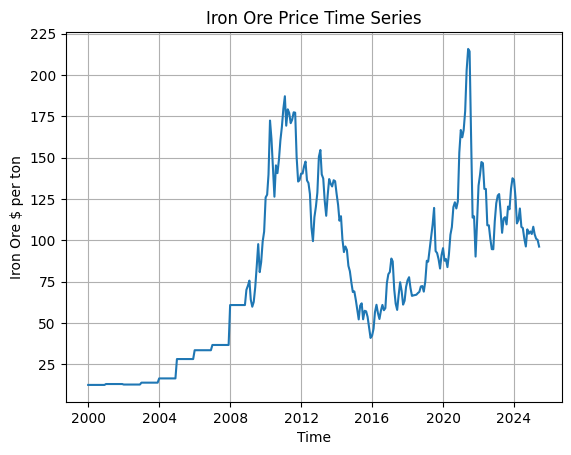

In [5]:
plt.plot(df)
plt.ylabel("Iron Ore $ per ton")
plt.xlabel("Time")
plt.title("Iron Ore Price Time Series")
plt.grid(True)

## 1.1) Yahoo Finance data

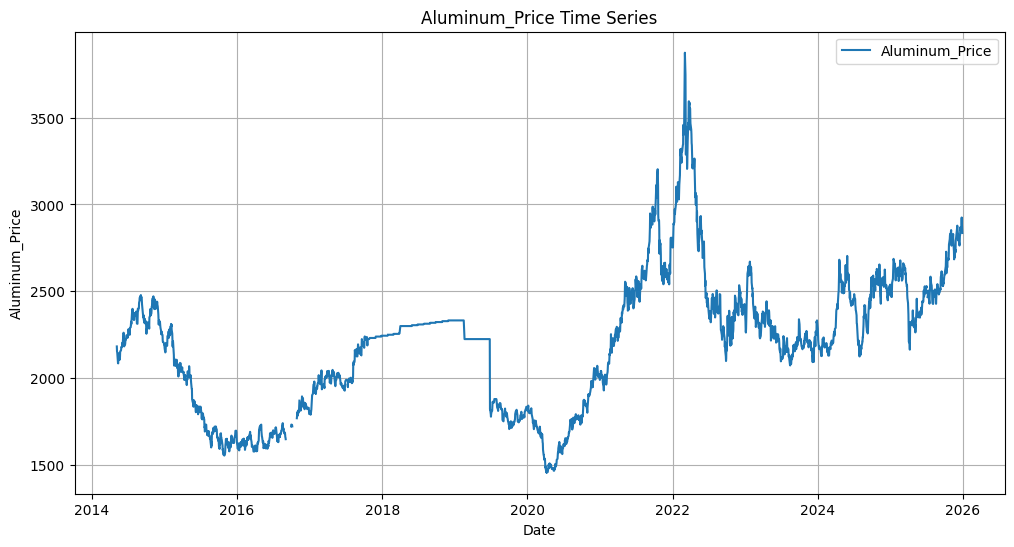

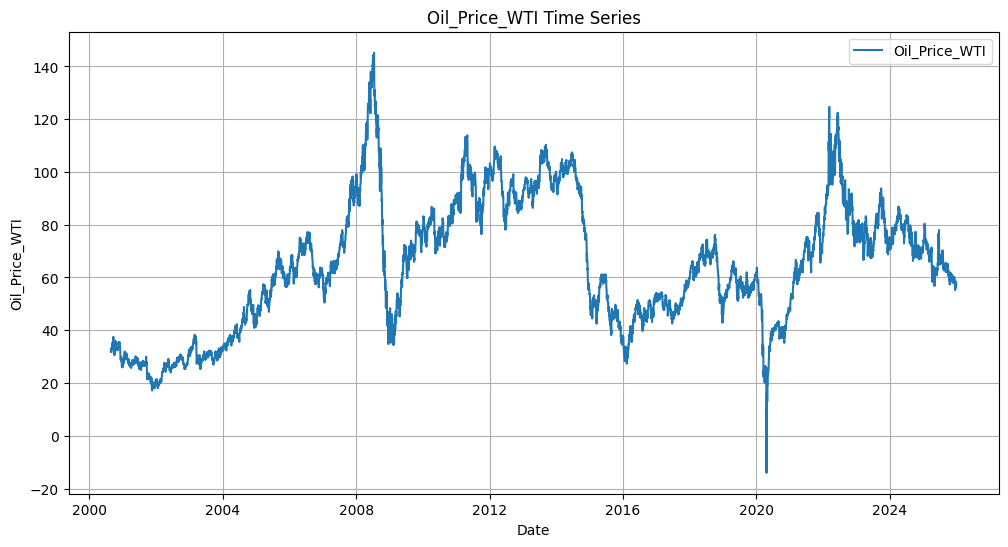

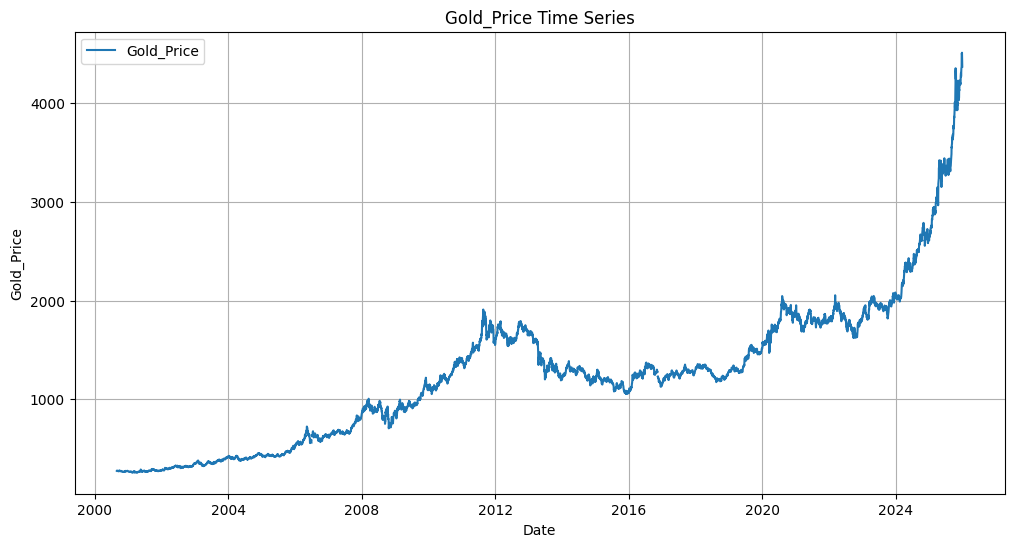

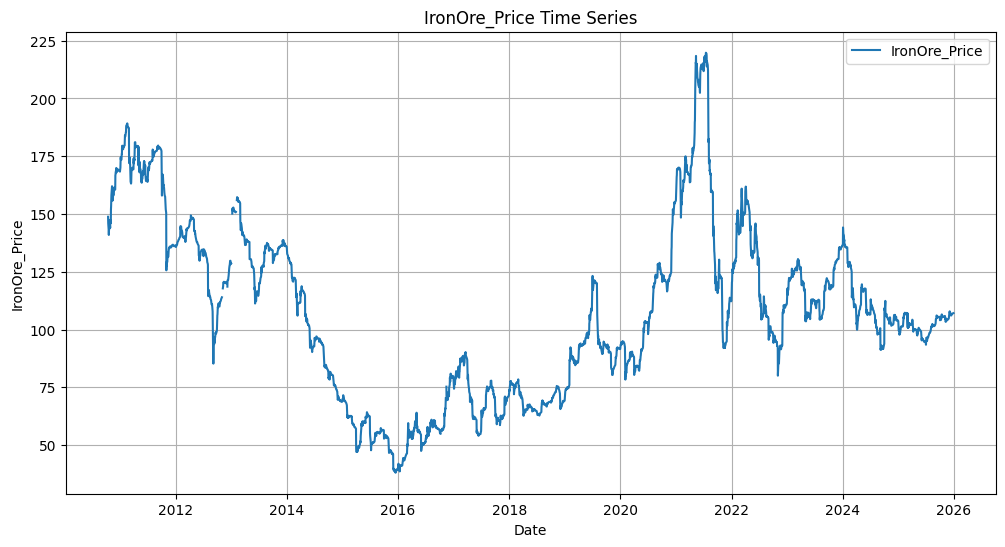

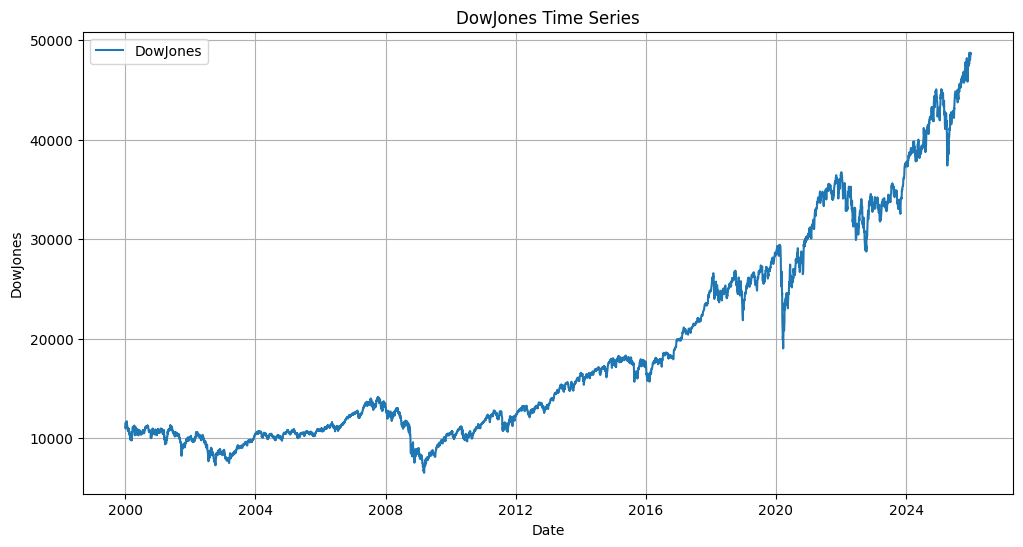

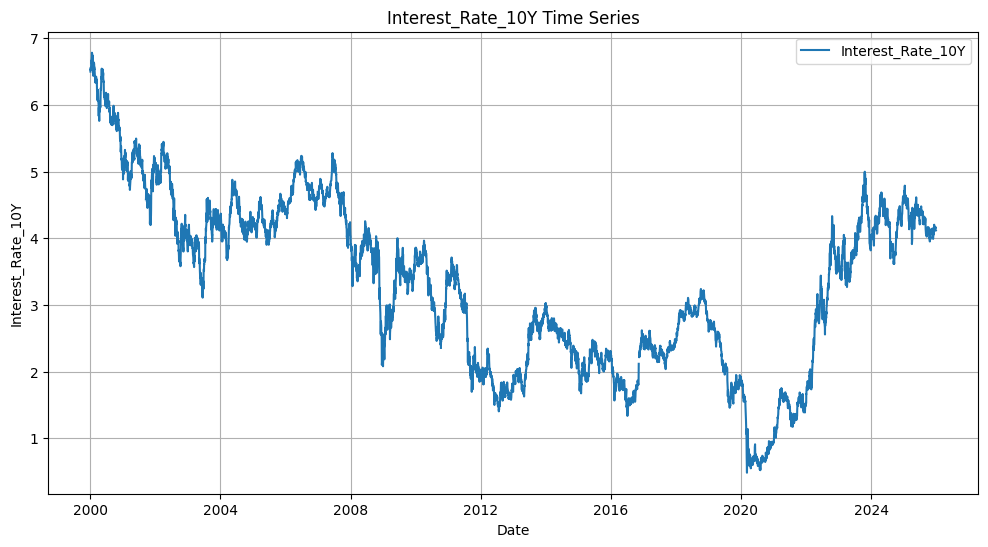

In [12]:
# Date range
start = "2000-01-01"
end = datetime.today().strftime("%Y-%m-%d")

# Tickers dictionary
tickers = {
    "Gold_Price": "GC=F",
    "Oil_Price_WTI": "CL=F",
    "Interest_Rate_10Y": "^TNX",
    "DowJones": "^DJI",
    "Aluminum_Price": "ALI=F",
    "IronOre_Price": "TIO=F"
}

# Download data
raw_df = yf.download(
    list(tickers.values()),
    start=start,
    end=end,
    progress=False
)['Open']

# Correctly map columns
df_yf = raw_df.copy()
df_yf.columns = [list(tickers.keys())[list(tickers.values()).index(c)] for c in raw_df.columns]

# Plot each time series on a separate plot
for col in df_yf.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df_yf.index, df_yf[col], label=col)
    plt.title(f'{col} Time Series')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    plt.show()

In [13]:
df_yf.describe()

,Aluminum_Price,Oil_Price_WTI,Gold_Price,IronOre_Price,DowJones,Interest_Rate_10Y
count,2894.00000,6365.000000,6356.000000,3812.000000,6537.000000,6531.000000
mean,2199.92735,64.678064,1250.560384,106.920341,18958.007341,3.311380
std,379.53286,24.582924,726.814674,37.076291,10470.720847,1.294153
min,1456.00000,-14.000000,255.000000,38.029999,6547.009766,0.484000
25%,1888.68750,46.279999,648.899994,76.209999,10632.459961,2.229000
50%,2231.75000,63.740002,1248.450012,104.940002,13887.900391,3.413000
75%,2411.50000,81.940002,1677.149994,130.895000,25991.910156,4.293500
max,3873.00000,145.190002,4512.000000,219.770004,48714.750000,6.781000


In [21]:
oldest_dates_yf = df_yf.apply(lambda col: col.first_valid_index())
oldest_dates_yf

Aluminum_Price      2014-05-06
Oil_Price_WTI       2000-08-23
Gold_Price          2000-08-30
IronOre_Price       2010-10-14
DowJones            2000-01-03
Interest_Rate_10Y   2000-01-03
dtype: datetime64[ns]

## 1.2) FRED Data

In [16]:
import pandas_datareader.data as web
from datetime import datetime

# Date range
start = "2000-01-01"
end = datetime.today()

# FRED series mapping for the indicators you listed
fred_series = {
    "Exchange Rate": "DEXCAUS",          # US Dollar to Canadian Dollar
    "Inflation Rate": "FPCPITOTLZGUSA",        # CPI for All Urban Consumers (example for US inflation)
    "China GDP": "MKTGDPCNA646NWDB",            # China GDP
    "US GDP": "GDPC1",# US Gross Domestic Product
    "Steel_Price" : "WPU1012"
}

# Download data from FRED
df_fred = pd.DataFrame()
for name, code in fred_series.items():
    df_fred[name] = web.DataReader(code, 'fred', start, end)


# Show first few rows
print(df_fred.head())


            Exchange Rate  Inflation Rate  China GDP  US GDP  Steel_Price
DATE                                                                     
2000-01-03         1.4465             NaN        NaN     NaN          NaN
2000-01-04         1.4518             NaN        NaN     NaN          NaN
2000-01-05         1.4518             NaN        NaN     NaN          NaN
2000-01-06         1.4571             NaN        NaN     NaN          NaN
2000-01-07         1.4505             NaN        NaN     NaN          NaN


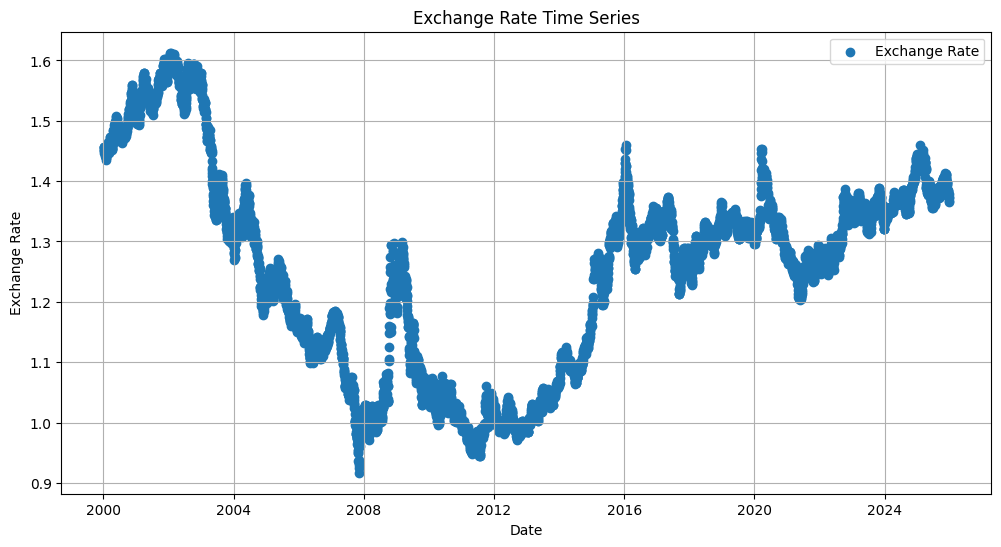

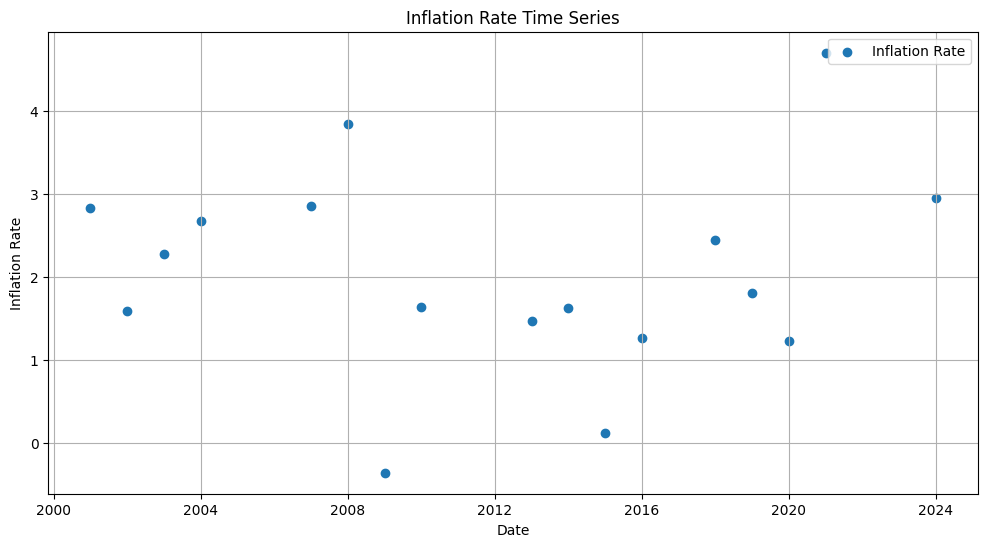

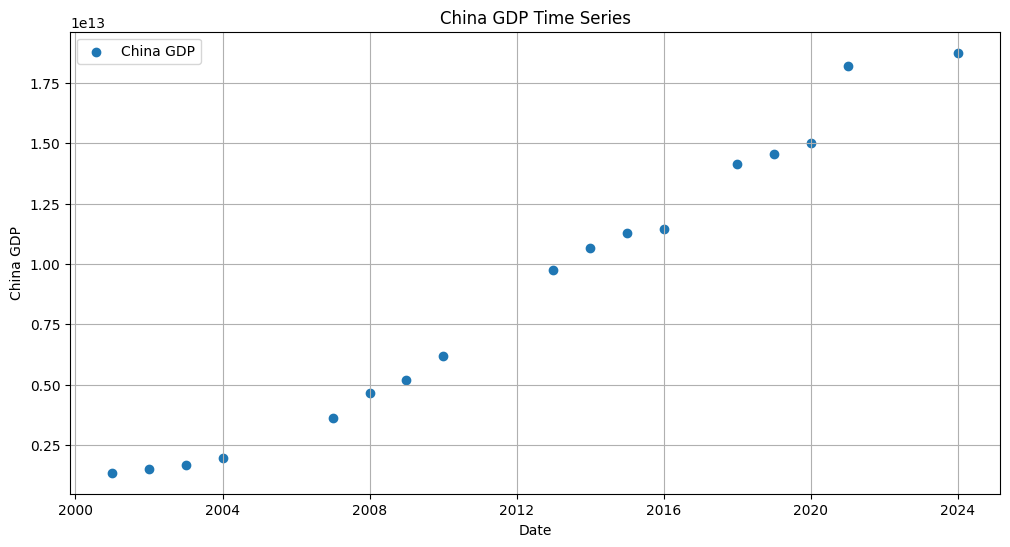

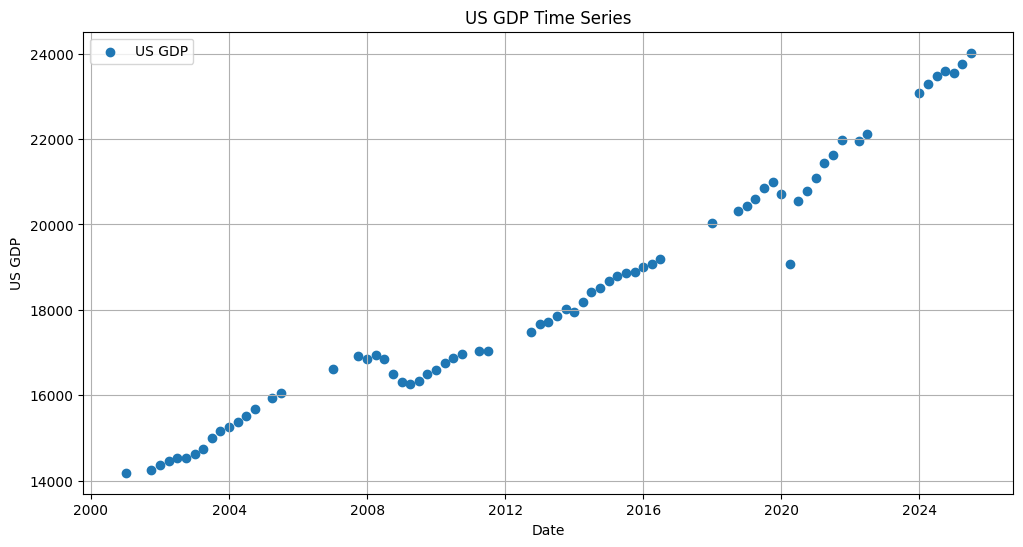

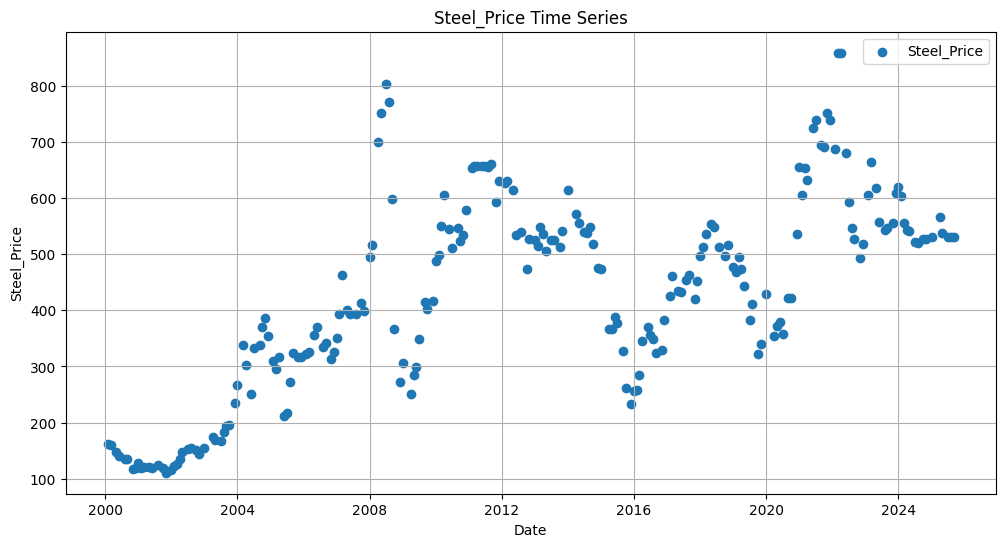

In [17]:
# Plot each series on a separate figure
for col in df_fred.columns:
    plt.figure(figsize=(12, 6))
    plt.scatter(df_fred.index, df_fred[col], label=col)
    plt.title(f'{col} Time Series')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    plt.show()

In [18]:
df_fred.describe()

,Exchange Rate,Inflation Rate,China GDP,US GDP,Steel_Price
count,6515.000000,17.000000,1.700000e+01,71.000000,220.000000
mean,1.254505,2.055225,8.821815e+12,18316.576028,431.224641
std,0.167992,1.240809,5.994371e+12,2777.964655,173.980167
min,0.916800,-0.355546,1.355037e+12,14183.120000,110.600000
25%,1.105000,1.464833,3.604056e+12,16312.271500,320.625000
50%,1.283000,1.812210,9.743124e+12,17860.450000,453.750000
75%,1.358000,2.826171,1.414777e+13,20580.577000,545.950000
max,1.612800,4.697859,1.874380e+13,24024.957000,859.242000


In [22]:
oldest_dates_fred = df_fred.apply(lambda col: col.first_valid_index())
oldest_dates_fred

Exchange Rate    2000-01-03
Inflation Rate   2001-01-01
China GDP        2001-01-01
US GDP           2001-01-01
Steel_Price      2000-02-01
dtype: datetime64[ns]

## 1.3) Normalize data

### 1.3.1) Align Start Dates

In [40]:
max_start_date = max(max(oldest_dates_yf), max(oldest_dates_fred))
max_start_date

Timestamp('2014-05-06 00:00:00')

In [44]:
mask_yf = df_yf.index >= max_start_date
mask_fred = df_fred.index >= max_start_date


In [45]:
df_yf_filtered = df_yf[mask_yf]
df_fred_filtered = df_fred[mask_fred]

#### 1.3.2) Remove NaN

In [58]:
df_fred_filtered.isna().sum()

Exchange Rate      130
Inflation Rate    3032
China GDP         3032
US GDP            3007
Steel_Price       2941
dtype: int64

In [59]:
df_yf_filtered.isna().sum()


Aluminum_Price       39
Oil_Price_WTI         2
Gold_Price            3
IronOre_Price         3
DowJones              2
Interest_Rate_10Y     3
dtype: int64